# STV Bham-64 8.8km datasets

In [1]:
from collections import defaultdict
import os

import IPython
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr

from ml_downscaling_emulator.plotting import plot_map, create_map_fig

In [2]:
datasets = {
    "cpm": "bham_gcmx-4x_spechum-temp-vort_random",
    "gcm": "bham_60km-4x_spechum-temp-vort_random"
}

split = "train"

ds = xr.concat(
    [ xr.open_dataset(os.path.join(os.getenv("MOOSE_DERIVED_DATA"), "nc-datasets", dataset_name, f"{split}.nc")) for dataset_name in datasets.values() ],
    pd.Index(datasets.keys(), name='source')
).drop_vars("pressure")

gcm_ds = ds.sel(source="gcm")
cpm_ds = ds.sel(source="cpm")

In [3]:
VAR_TYPES = ["vorticity", "spechum", "temp"]
THETAS = [250, 500, 700, 850, 925]

vorticity250

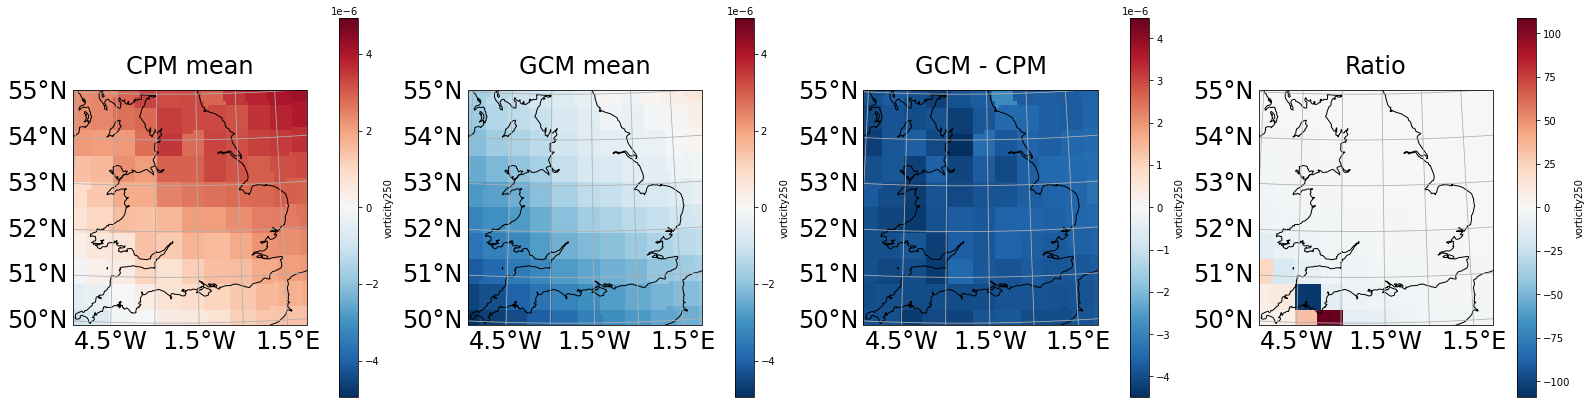

vorticity500

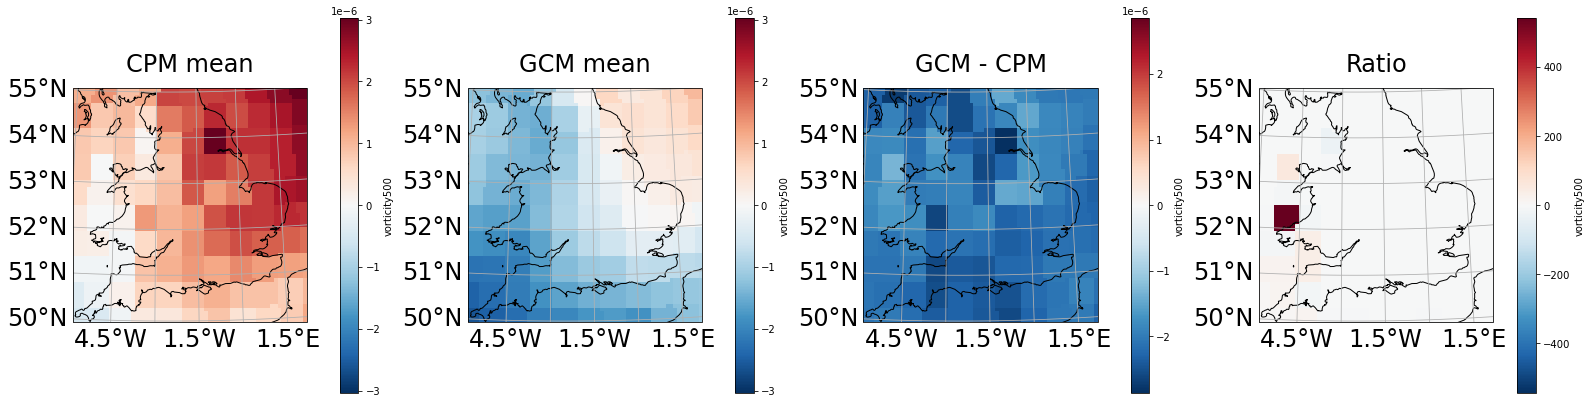

vorticity700

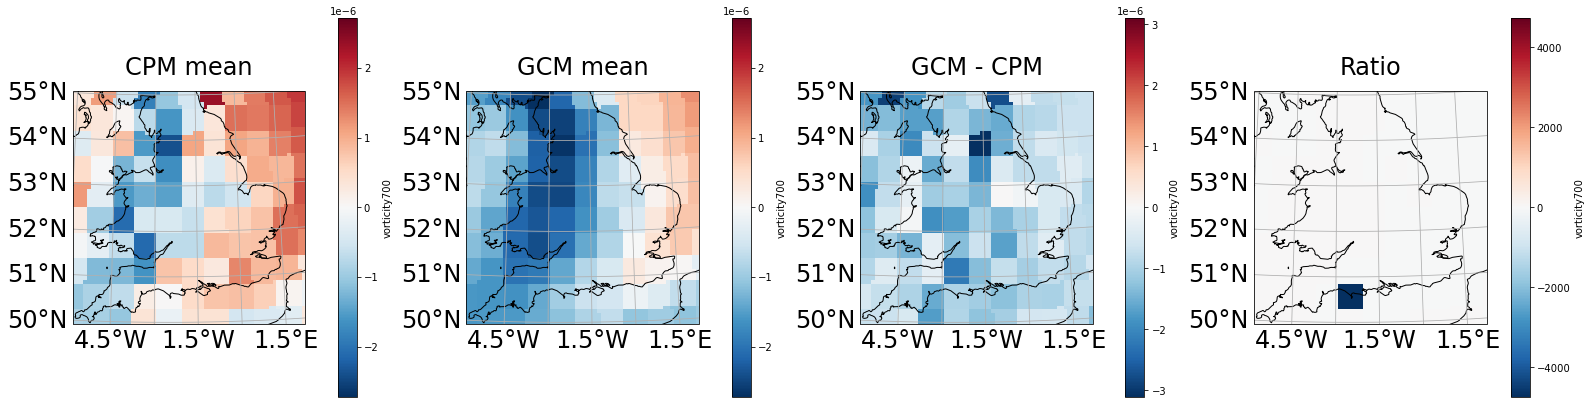

vorticity850

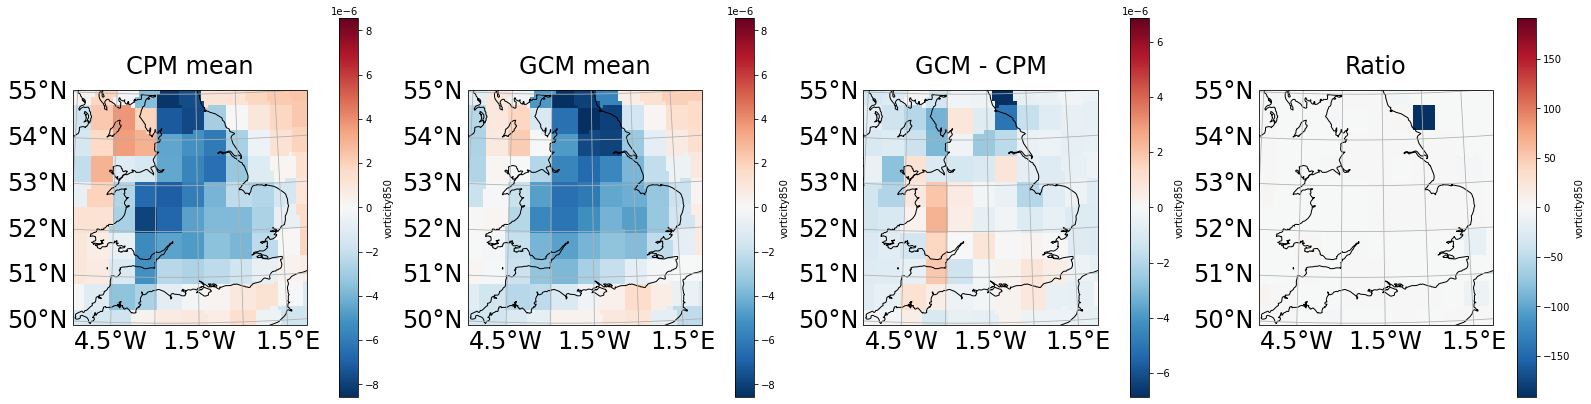

vorticity925

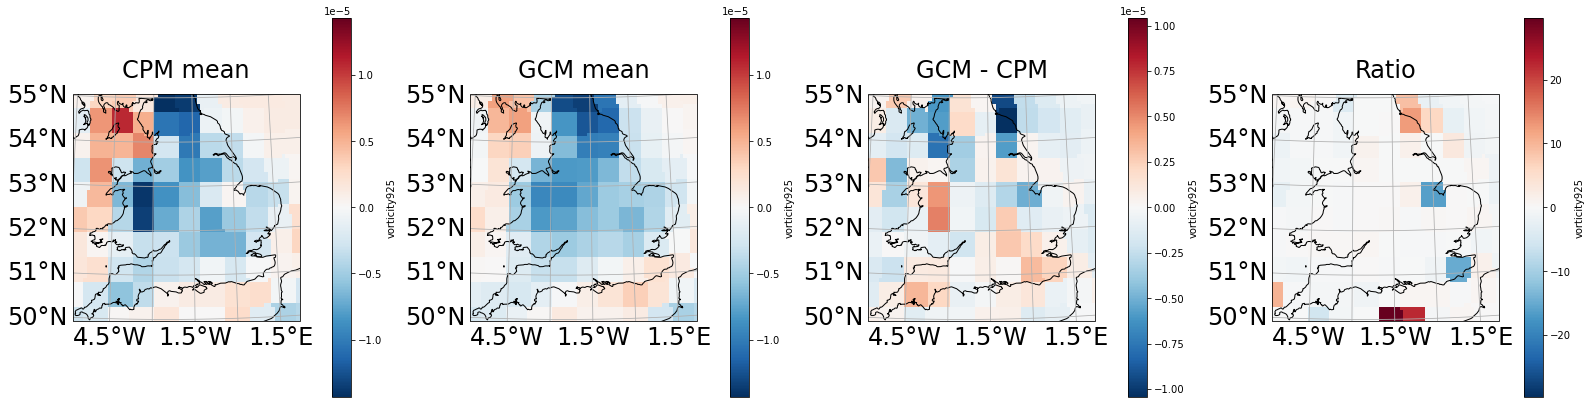

In [4]:
variables = [ f"vorticity{theta}" for theta in THETAS]
for variable in variables:
    IPython.display.display_html(f"<h1>{variable}</h1>", raw=True)
    
    data = {
        "CPM mean": cpm_ds[variable].mean(dim=["time"]),
        "GCM mean": gcm_ds[variable].mean(dim=["time"])
    }
    data["GCM - CPM"] = data["GCM mean"] - data["CPM mean"]
    data["Ratio"] = data["GCM - CPM"]/data["CPM mean"]

    mean_min = min(data["CPM mean"].min(), data["GCM mean"].min())
    mean_max = max(-mean_min, data["CPM mean"].max(), data["GCM mean"].max())
    plotkwargs = defaultdict(list, **{
        "CPM mean": dict(center=0, vmax=mean_max),
        "GCM mean": dict(center=0, vmax=mean_max),
        "GCM - CPM": dict(center=0),
        "Ratio": dict(center=0)
    })
    
    _, axd = create_map_fig([data.keys()])

    for key, da in data.items():
        plot_map(da, axd[key], title=key, style=None, add_colorbar=True, **plotkwargs[key])

    plt.show()

spechum250

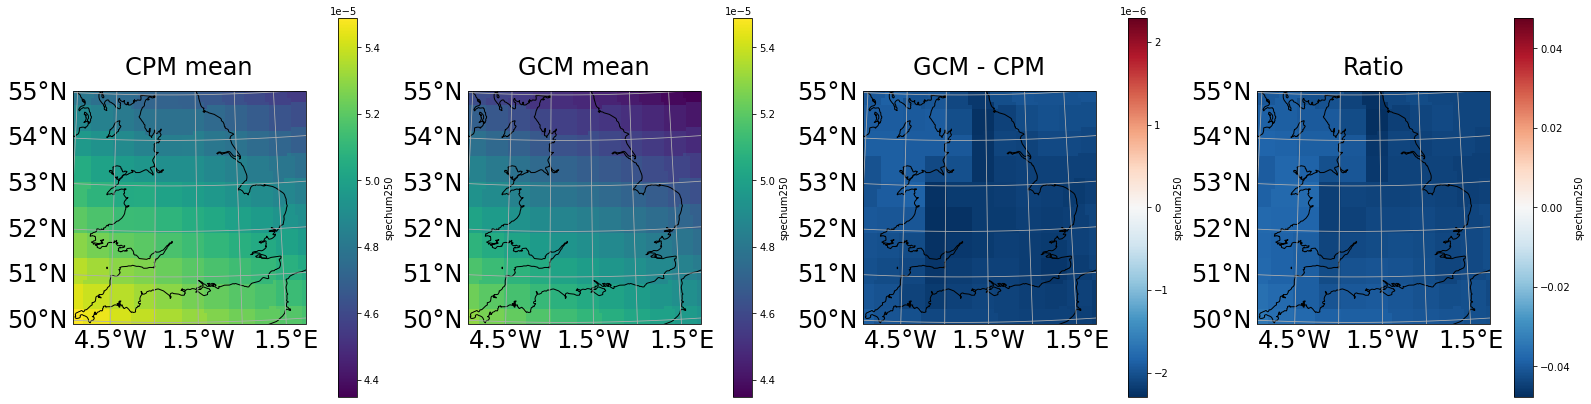

spechum500

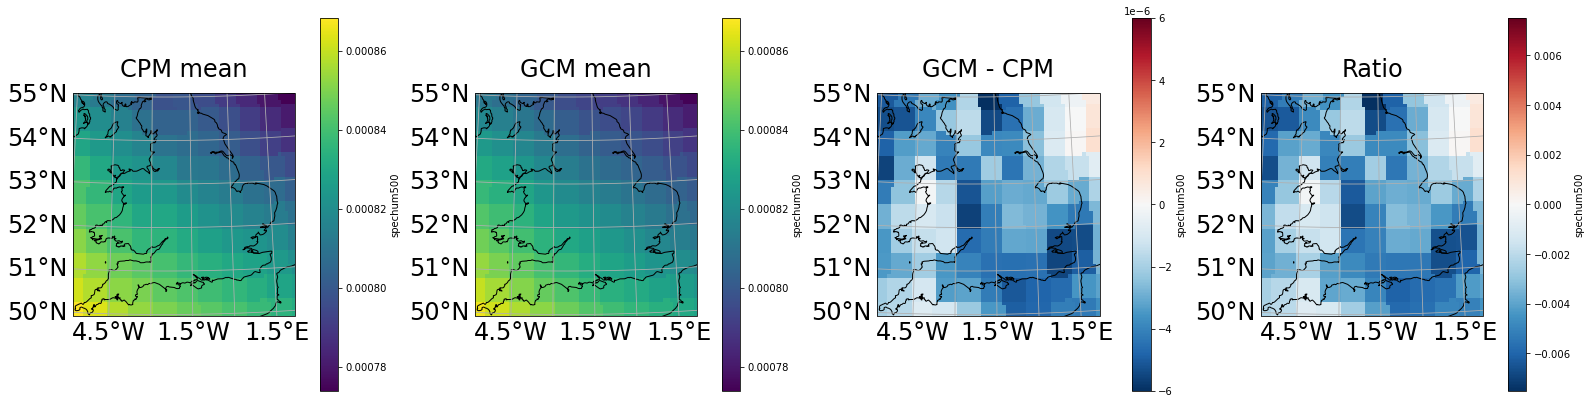

spechum700

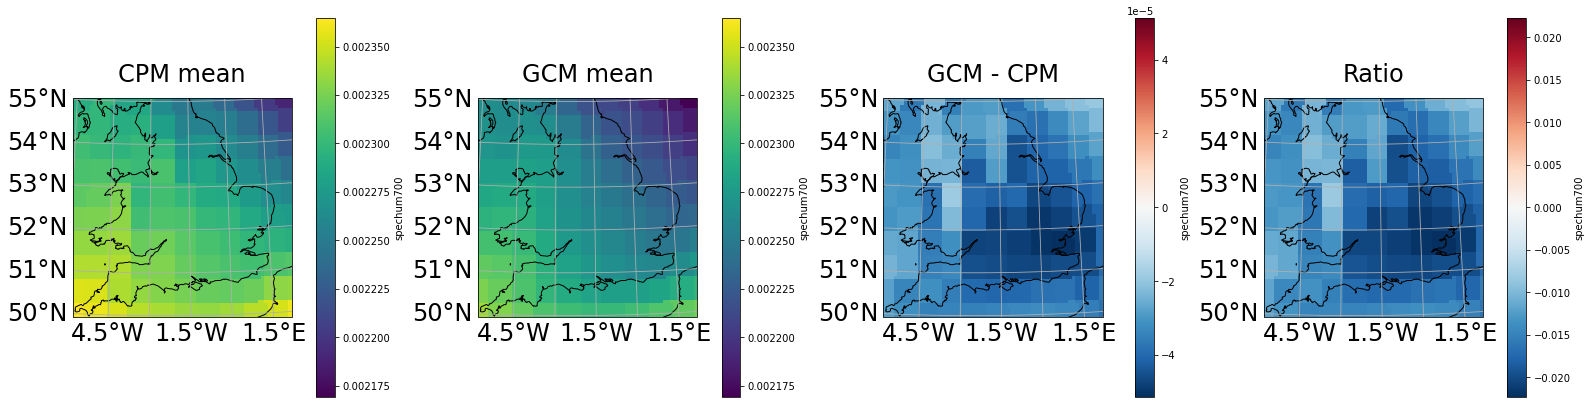

spechum850

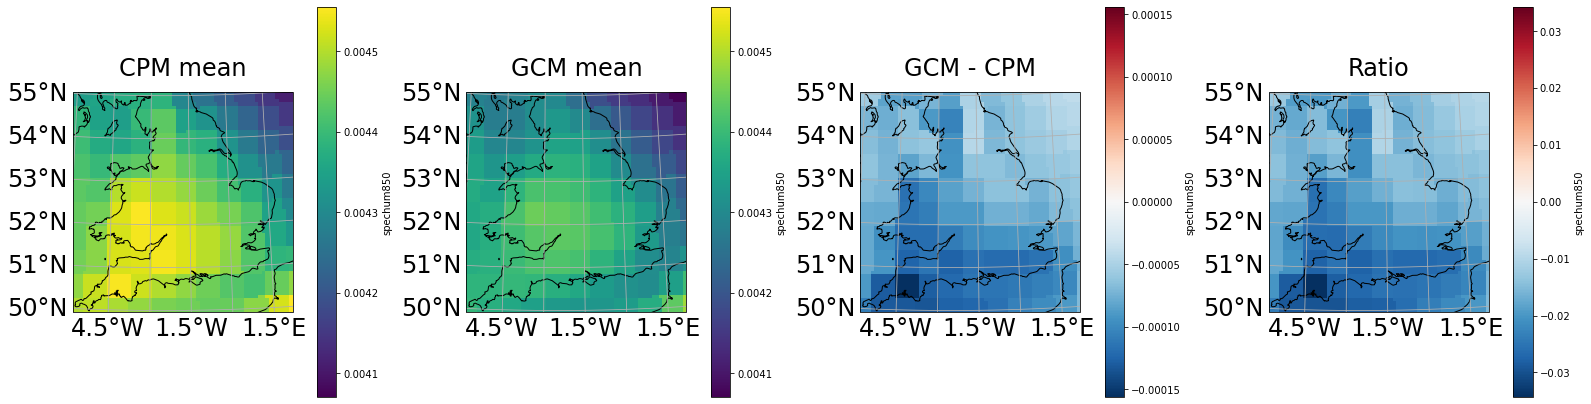

spechum925

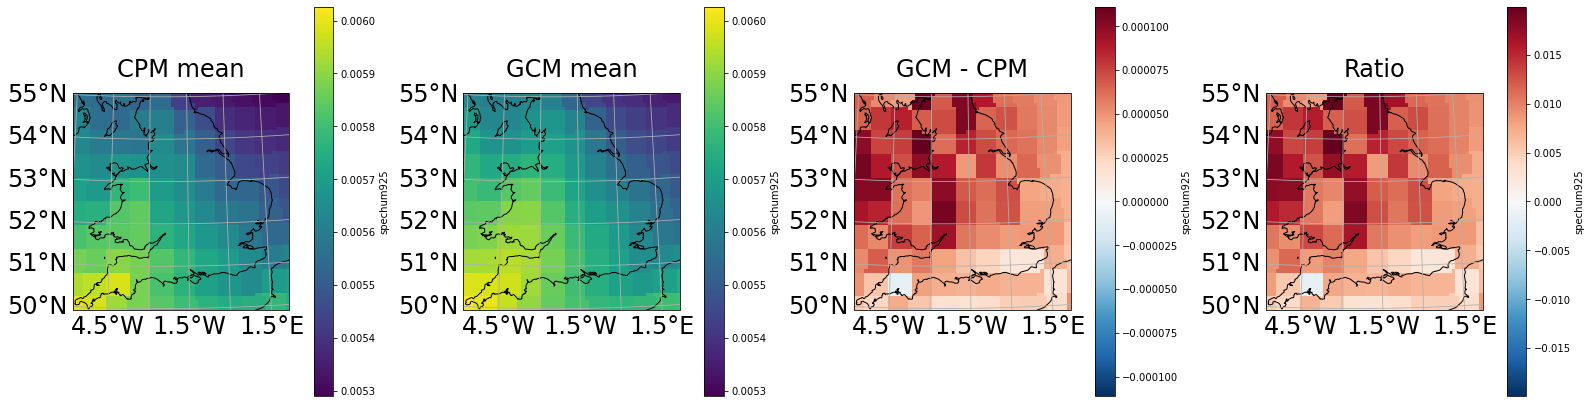

In [5]:
variables = [ f"spechum{theta}" for theta in THETAS]
for variable in variables:
    IPython.display.display_html(f"<h1>{variable}</h1>", raw=True)
    
    data = {
        "CPM mean": cpm_ds[variable].mean(dim=["time"]),
        "GCM mean": gcm_ds[variable].mean(dim=["time"])
    }
    data["GCM - CPM"] = data["GCM mean"] - data["CPM mean"]
    data["Ratio"] = data["GCM - CPM"]/data["CPM mean"]

    mean_min = min(data["CPM mean"].min(), data["GCM mean"].min())
    mean_max = max(-mean_min, data["CPM mean"].max(), data["GCM mean"].max())
    plotkwargs = defaultdict(list, **{
        "CPM mean": dict(vmin=mean_min, vmax=mean_max),
        "GCM mean": dict(vmin=mean_min, vmax=mean_max),
        "GCM - CPM": dict(center=0),
        "Ratio": dict(center=0)
    })
    
    _, axd = create_map_fig([data.keys()])

    for key, da in data.items():
        plot_map(da, axd[key], title=key, style=None, add_colorbar=True, **plotkwargs[key])

    plt.show()

temp250

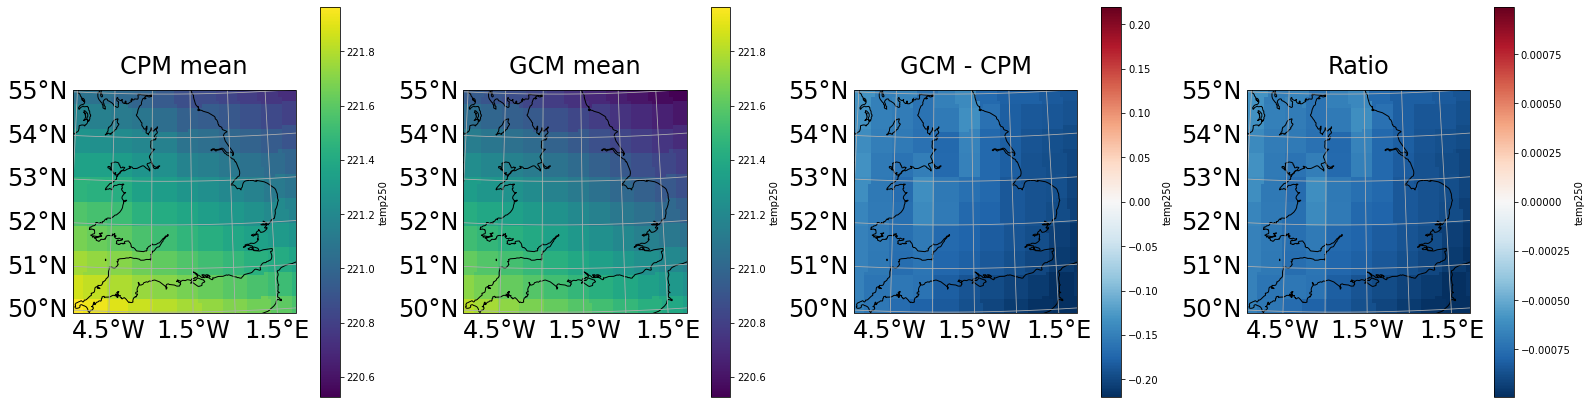

temp500

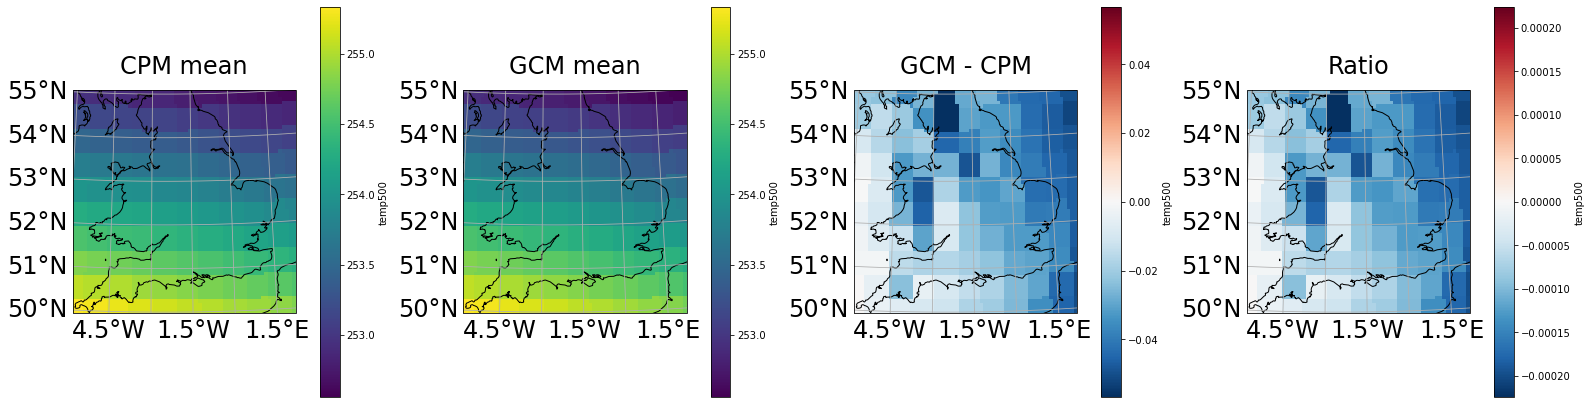

temp700

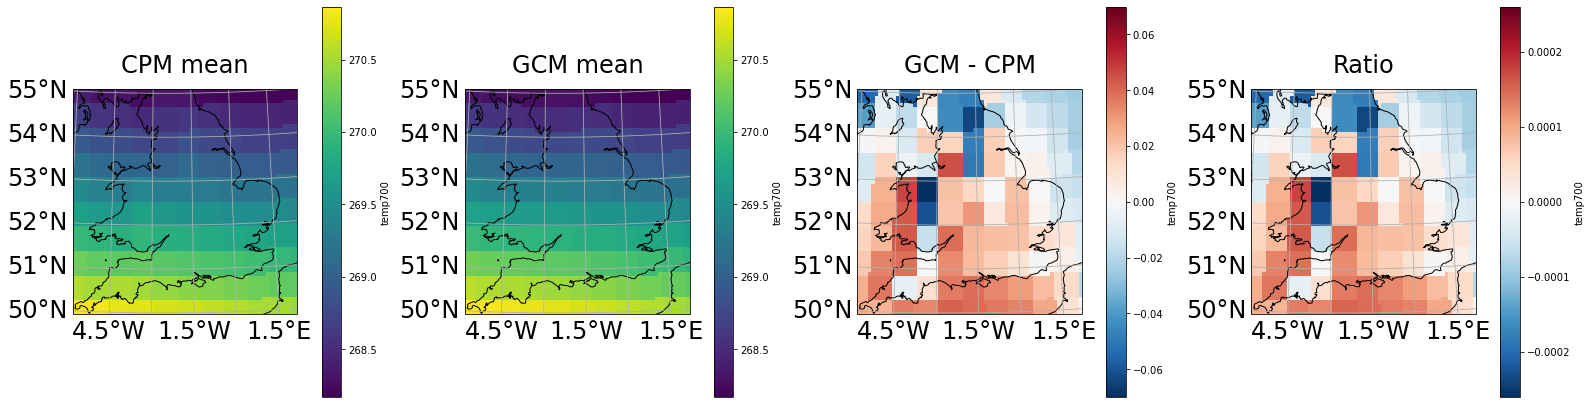

temp850

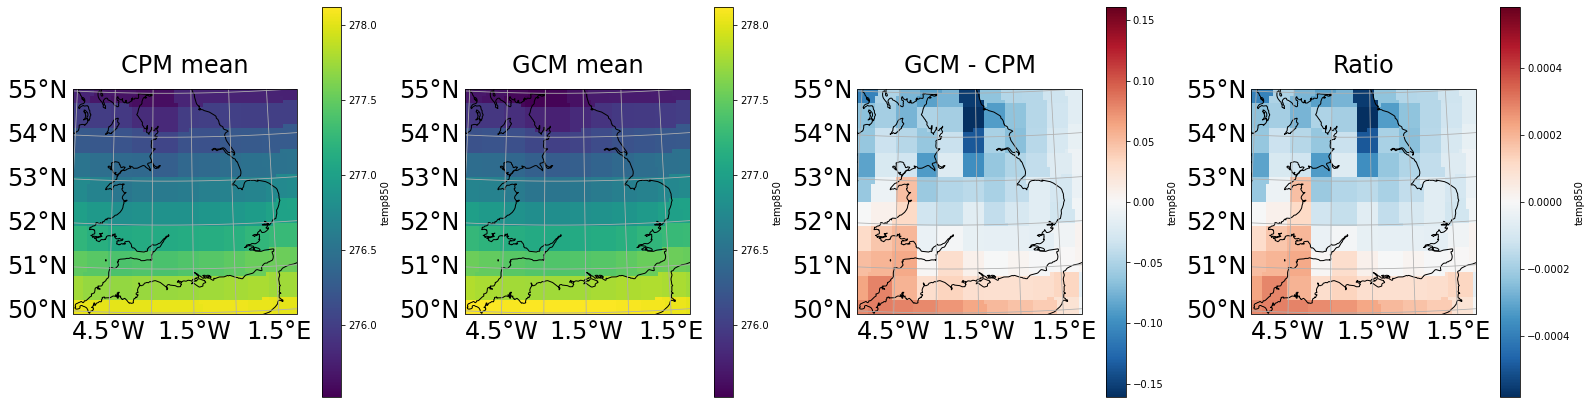

temp925

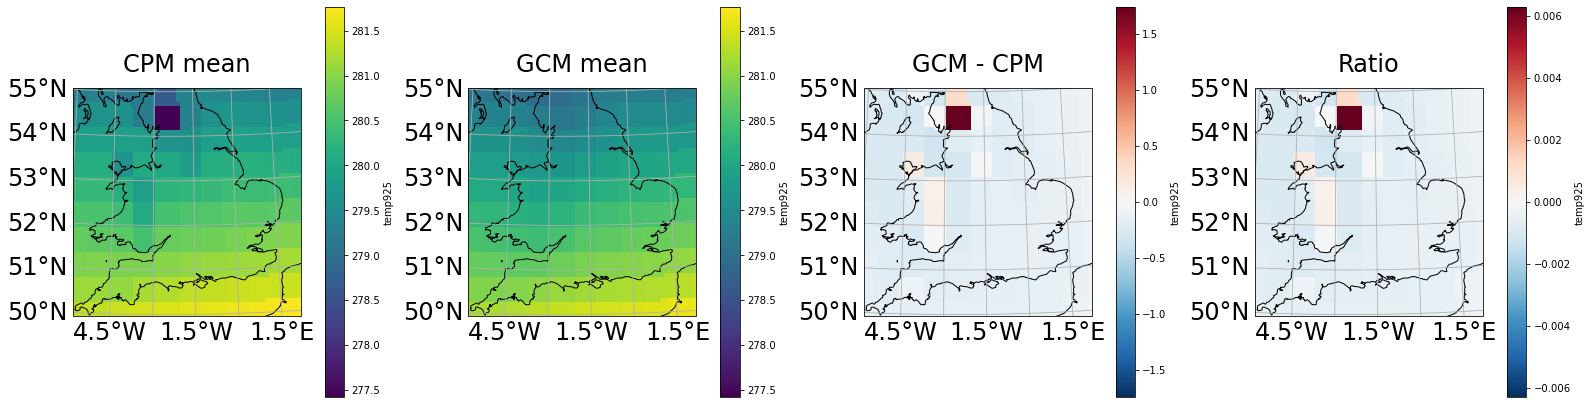

In [6]:
variables = [ f"temp{theta}" for theta in THETAS]
for variable in variables:
    IPython.display.display_html(f"<h1>{variable}</h1>", raw=True)
    
    data = {
        "CPM mean": cpm_ds[variable].mean(dim=["time"]),
        "GCM mean": gcm_ds[variable].mean(dim=["time"])
    }
    data["GCM - CPM"] = data["GCM mean"] - data["CPM mean"]
    data["Ratio"] = data["GCM - CPM"]/data["CPM mean"]

    mean_min = min(data["CPM mean"].min(), data["GCM mean"].min())
    mean_max = max(-mean_min, data["CPM mean"].max(), data["GCM mean"].max())
    plotkwargs = defaultdict(list, **{
        "CPM mean": dict(vmin=mean_min, vmax=mean_max),
        "GCM mean": dict(vmin=mean_min, vmax=mean_max),
        "GCM - CPM": dict(center=0),
        "Ratio": dict(center=0)
    })
    
    _, axd = create_map_fig([data.keys()])

    for key, da in data.items():
        plot_map(da, axd[key], title=key, style=None, add_colorbar=True, **plotkwargs[key])

    plt.show()